In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


Change the Directory from base Where we put our data and codes(1Final_housing.ipynb)

In [2]:
os.chdir('H:\globsyn Machine learning\Fourth year project\codes')
print(os.getcwd())

H:\globsyn Machine learning\Fourth year project\codes


# Overview of the Data
This data has metrics like population, median income, median housing price for each block group in califorania.

 problem:

Is it supervised, unsupervised or reinforcement learning ? Is it a classification task, a regression task or something different ? Our problem is clearly a supervised learning task, because we have labeled input data. It is also clearly a regression task since you have to predict a numeric value.

In [3]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


see a brief description of the data using the method above. 

there are 20640 instances in the whole datase. All columns of our data have numerical value accept ocean_proximity which have categorial value.

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


When we describe the data by using (data.describe()) and Be aware of the fact, that all null values are ignored here. The std row shows you the standard deviation, which quantifies the amount of variation between the values. The 25%, 50%, 75% are the percentiles. For an example 75% of the districts have housing_median_age of lower than 37 while 50% are lower than 29 and 25% are lower than 18. These are often called the 25th percentile, the median and the 75th percentile.

Another good way to explore a given dataset is to plot the heatmap, pairplot and histogrom of each numerical attribute.
Heatmap Show you the corelation metrix of the data. A histogram shows you the number of instances and the number of the given value range.

C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


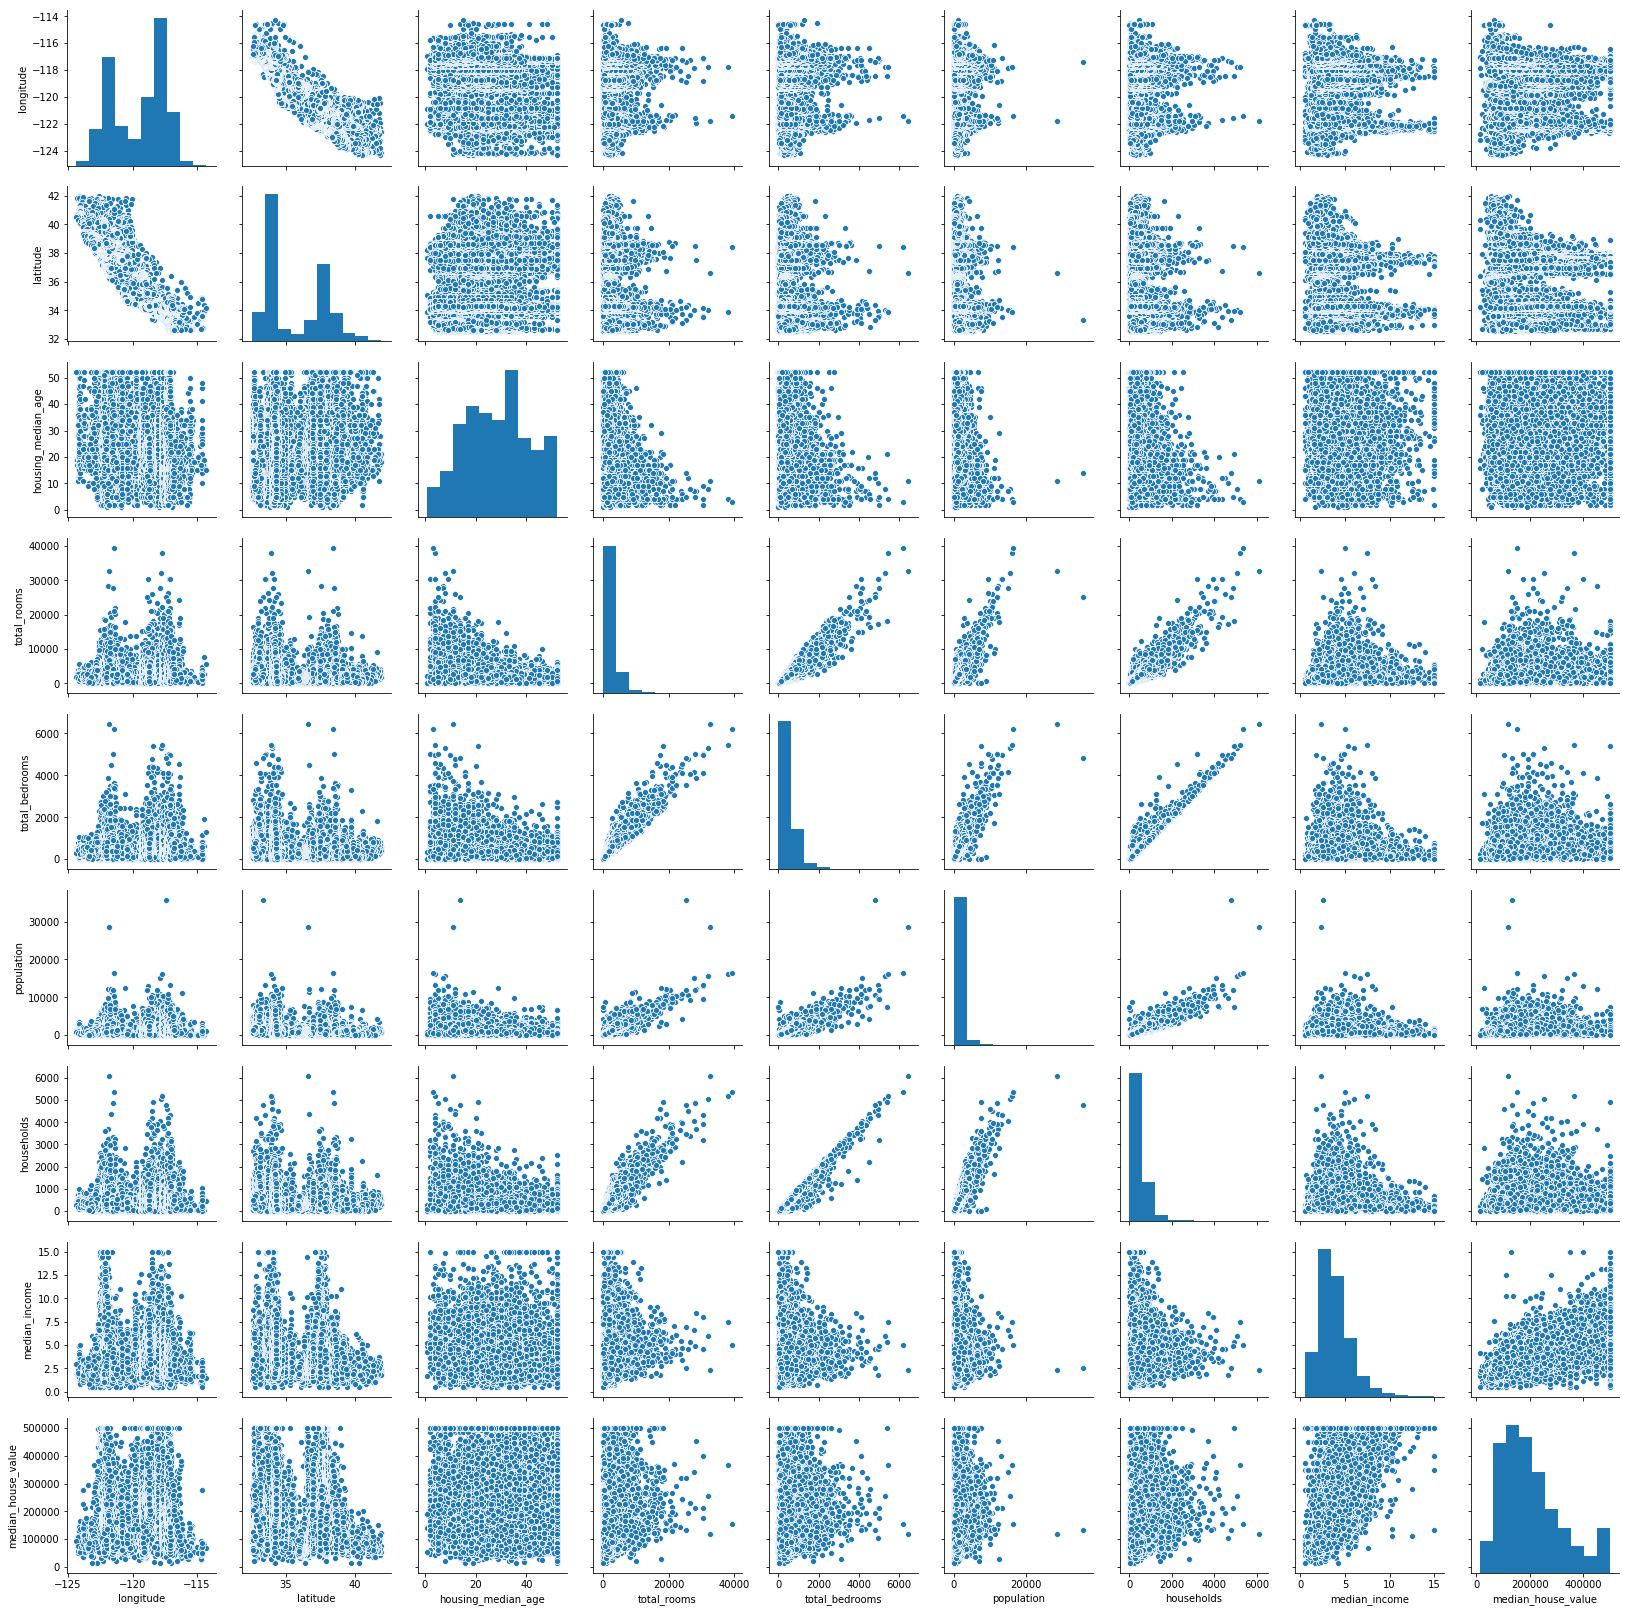

In [6]:
sns.pairplot(data)

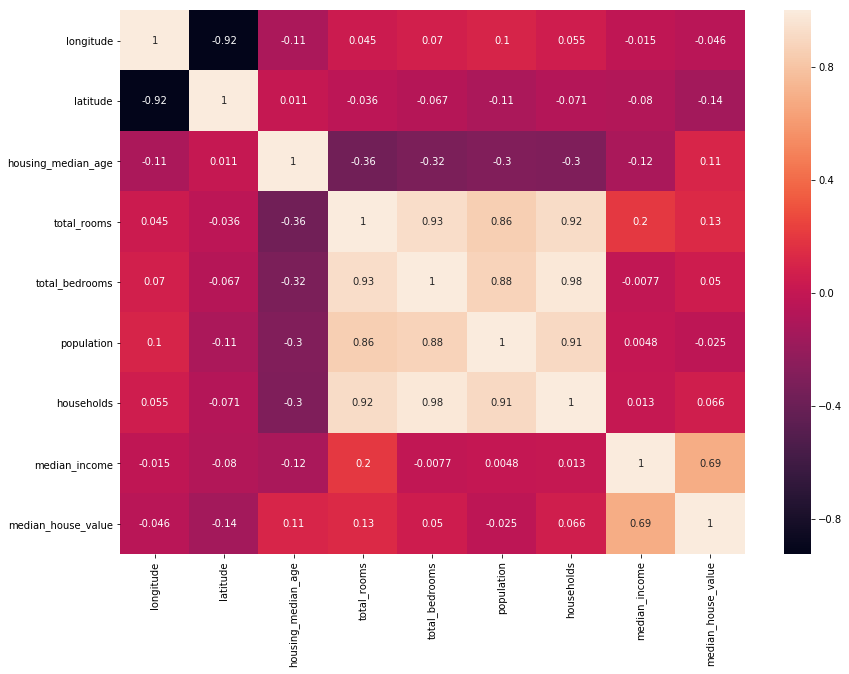

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

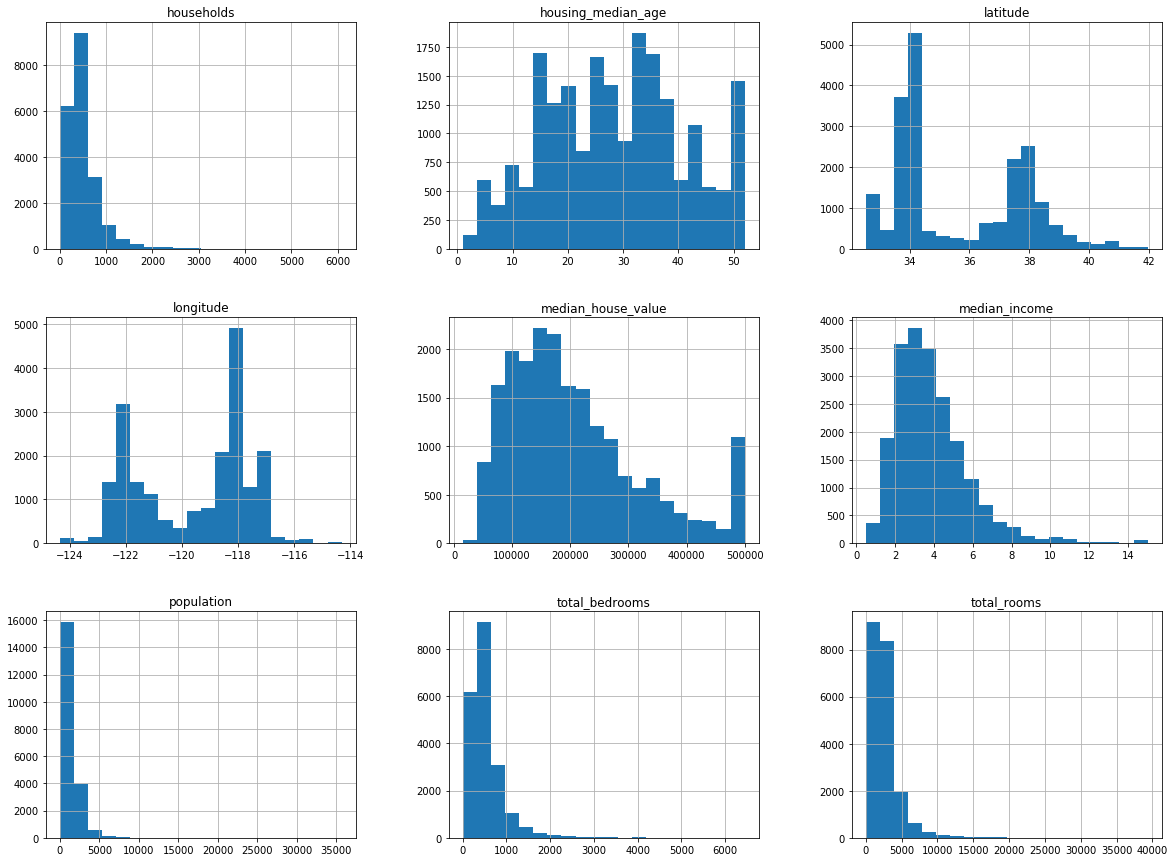

In [8]:
data.hist(bins=20, figsize=(20, 15))
plt.show()


The code below transforms the median_income attribute into a categorical one by dividing the median income by 1.5 to limit the number of income categories and rounds it up using "np.ceil()" to have discrete categories. It merges all the categories that are greater than 5 into category 5. The categories are represented in the histogram below the code.

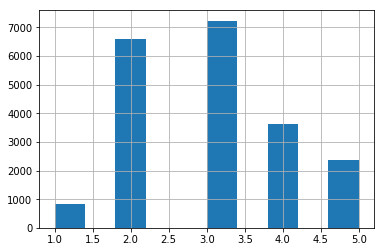

In [9]:
data_copy = data.copy()

data_copy['income_category']= np.ceil(data_copy['median_income']/1.5)

# label what is above five as five
data_copy['income_category'].where(data_copy['income_category'] < 5, 5.0, inplace=True)
data_copy['income_category'].hist()

# Think about latitude and longitude feature:-

Here we do the scatter ploting by using latitude on y-axis and longitude on x-axis. First of all, we want to visualize the geographical data with latitude and longitude. A good way to do this is to create a scatterplot of all the districts. 

It is important that you set alpha equal to 0.1, because then the scatterplot has a high density and therefore it is much easier to visualize.


Now we will look at the housing prices at the scatterplot below. The color represents the price and the radius of each circle represents the districts population.

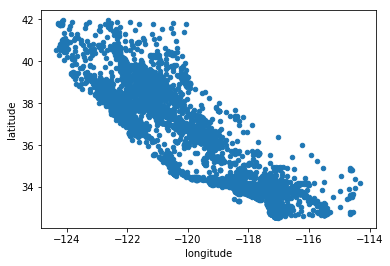

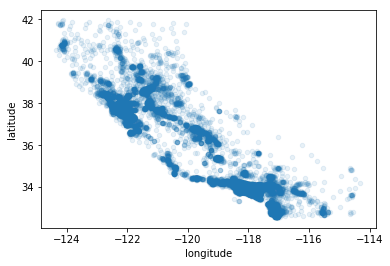

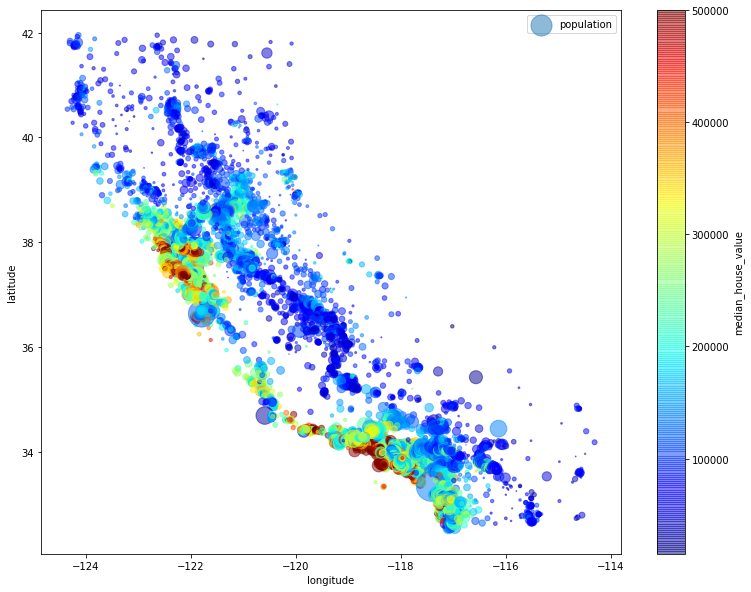

In [10]:
data_copy.plot(kind='scatter', x='longitude', y='latitude')

data_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

data_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=data_copy['population']/40, label='population', figsize=(13,10),
                   c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

plt.legend()


here we take a image of California map and plot our latitude and langitude cordinates with respect to median_house_value

If you are fimiliar with California you can clearly see, the high density in the Bay Area, Los Angelos, San Diego and in the Central Valley around Sacramento and Fresno. Our brains are very good at finding patterns on pictures but you often need to play around with the parameters to make the important patterns really stand out.

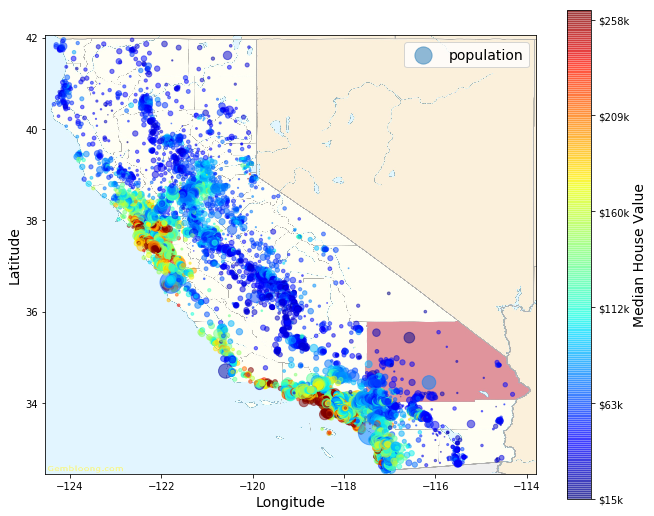

<Figure size 1008x720 with 0 Axes>

In [11]:
california_img=mpimg.imread('california0.jpg')

ax = data_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=data_copy['population']/60, label='population', figsize=(11,9),
                    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data_copy["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
cbar.set_label('Median House Value', fontsize=14)

plt.legend(fontsize=14)
plt.figure(figsize=(14,10))
plt.show()

# correlations:-
The coefficient of the correlation ranges from 1 to -1. The closer it is to 1 the more correlated it is and vice versa. Correlations that are close to 0, means that there is no correlation, neither negative or positive. You can see that the median_income is correlated the most with the median house value.

In [12]:
correlation_matrix = data.corr()
print(correlation_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

Before we now actually prepare the data to fed it into the model, we should think about combinating a few attributes. For example, the number of rooms within a district is of course not very helpful, if you don't know how many households are within that district. You want the number of roms per household. The number of bedrooms isn't that helpful for the same reason, but it would make sense to compare it with the total number of rooms within a household. Also the population per household would be an interesting attribute. I will create these new attributes in the code below and then we will look at the correlation matrix again.

In [13]:
data_copy['rooms_per_households'] = data_copy['total_rooms']/data_copy['households']
data_copy['bedrooms_per_room'] = data_copy['total_bedrooms']/data_copy['total_rooms']
data_copy['population_per_household']=data_copy['population']/data_copy['households']

In [14]:
correlation_matrix = data_copy.corr()
correlation_matrix ['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_category             0.643892
rooms_per_households        0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Now we see, that the bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms. Houses with a lower bedroom/room ratio tend to be more expensive. The rooms_per_household attribute is also better than the total number of rooms in a district. Obviously the larger the house, the higher the price.

In [15]:
data_copy.drop('income_category', axis = 1)
data_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_households,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,6.281853,0.172096,2.181467


In [16]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20433 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
income_category             20640 non-null float64
rooms_per_households        20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(13), object(1)
memory usage: 2.2+ MB


Now, we have 3 more columns in our data sets.

# Data Cleaning

In [17]:
print('check if any null value :', (data_copy.isnull().sum()))

check if any null value : longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_category               0
rooms_per_households          0
bedrooms_per_room           207
population_per_household      0
dtype: int64


Only total_bedrooms column have some null values. We replace that null values with the mean of the roral_bedrooms column.

In [18]:
data_copy.fillna(data_copy.mean()) 
data_copy=data_copy.fillna(data_copy.mean())

print('check after removing null value :\n', (data_copy.isnull().sum()))

data_copy.info()


check after removing null value :
 longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
income_category             0
rooms_per_households        0
bedrooms_per_room           0
population_per_household    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_va

## Dependent and Independent variables:-

We are going to predict the price of house(median_house_value). So our dependent variable is median_house_value column that is going into y variable.
rest of the columns are Independent variable and that all are going into y variable.

In [19]:
X = data_copy.drop(['median_house_value', 'ocean_proximity', 'income_category'],axis=1)
y = data_copy['median_house_value']
print(X.shape)

(20640, 11)


You can see the variation of categorical value that is ocean_proximity. There are 5 types of categorical values in ocean_aproximity feature. 

Text(0.5, 1.0, 'bar plot of Geographic Categories')

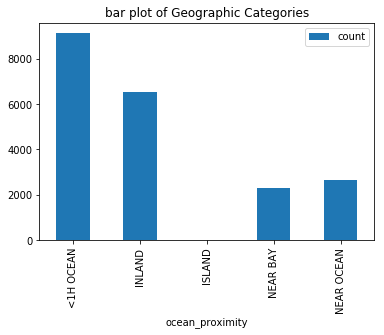

In [20]:
bar_plot = data_copy[['ocean_proximity', 'median_house_value']]
bar_plot.columns = ['ocean_proximity', 'count']
bar_plot.groupby('ocean_proximity').count().plot(kind='bar')
plt.title('bar plot of Geographic Categories')

In [21]:
categorial_value = data_copy['ocean_proximity']
categorial_value = pd.get_dummies(categorial_value)
categorial_value.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


The output is called Scipy sparse matrix and not a numpy array. A sparse matrix only stores the location of the non zero elements and doesn't store a matrix full of zeros except for one per row. This saves a lot of memory and is very useful when you have categorical attributes with thousands of categories.

In [22]:
X = np.append(X, categorial_value, axis = 1)
print(X.shape)

(20640, 16)


We add that sparse matrix into our Independent variable that is x and now independent variable have 16 columns that all are going into our model as input features.

# Splitting the data into training set and test set

Here we split tha data into training and test set. 20% data going into the test set and rest of all are going into our training model.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Standardize or Feature scaling of training data

Feature scaling is one of the most important transformations you need to apply, since nearly all machine learning algorithms perform bad when the input numerical attributes have widely varying scales, which is the case at our current dataset. For example, the median incomes range from o to 15, but the total number of rooms from 6 to 39,320. Note that scaling the target values is not required.

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
housing_data= scaler.transform(X_train)


# Applying Linear Regression
### Now, we have applied our first regression model to our test and train data set.

In [25]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### After applying the model we printed the predicted value and actual value of the first data. Here, the predictade value is way more than the actual value. Then we will try to find the root mean square error in our regression model to know, at which extent error in predicting values could occur.

In [26]:
y_pred= linear_regressor.predict(X_test)
print('Predicted Value :',y_pred[0])
print('Actual Value :',y_test.values[0])


Predicted Value : 210389.79517949745
Actual Value : 136900.0


### Here we can see that root mean square error is  approx 67947. It means the predicted value could be actual value +- 67947.

In [27]:
lin_mse =  mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67947.26799309158

### Now, we plot the predicted value againts the actual value to see the variations in our predicted data over our actual data. These types of plots and jointplots give clear insight of our predicted vaules . We can clearly see at which extent the predicted values are near the actual values.

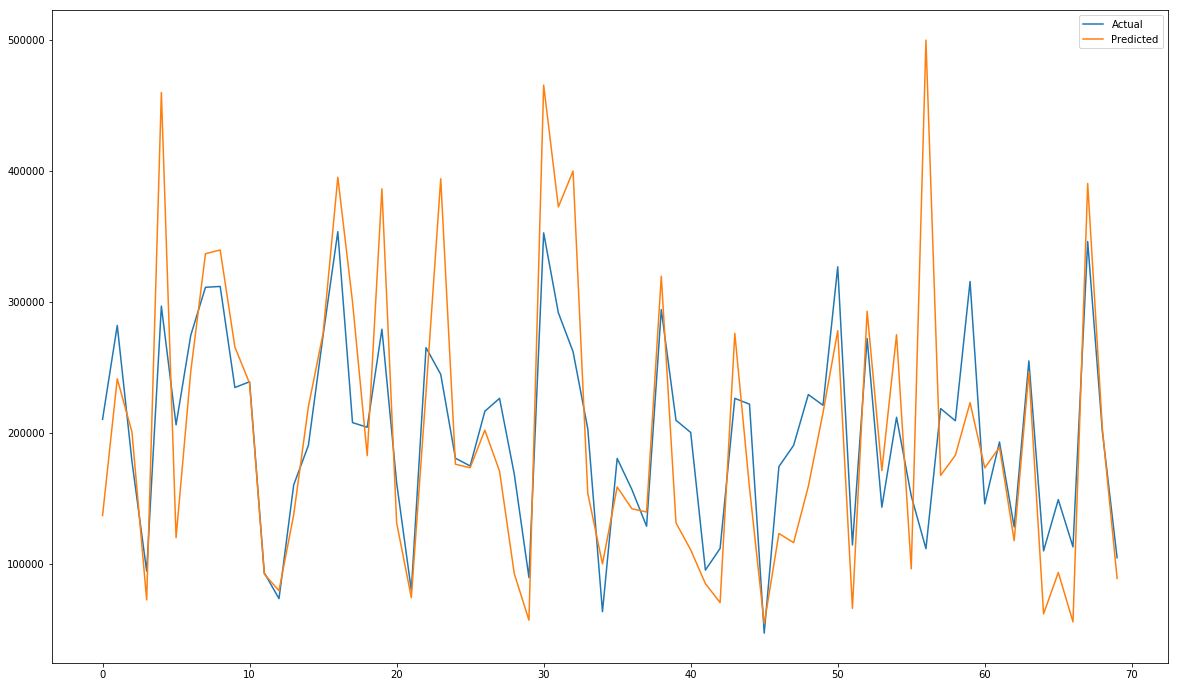

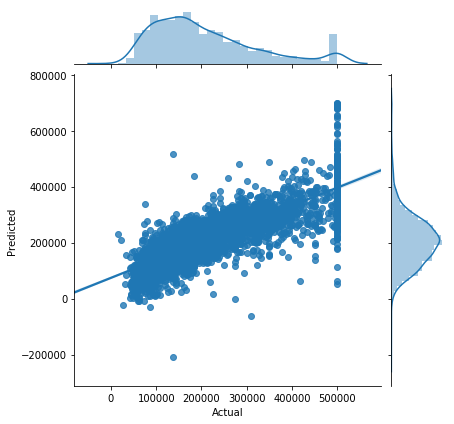

In [28]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.figure(figsize=(20,12))
plt.plot(test[:70])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

# Applying Decision Tree Regression
### after applying linear regression in our model, we didn't find that much of accuracy. Therefore we would try for another regression model

In [29]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### After applying the model we printed the predicted value and actual value of the first data. Here, the predictade value is way more than the actual value. Then we will try to find the root mean square error in our regression model to know, at which extent error in predicting values could occur.

In [30]:
y_pred_tree = decision_tree_regressor.predict(X_test)
print('Predicted Value :',y_pred_tree[0])
print('Actual Value :',y_test.values[0])


Predicted Value : 144500.0
Actual Value : 136900.0


### Here we can see that root mean square error is  approx 70092. It means the predicted value could be actual value +- 70092.

In [31]:
tree_mse =  mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

70122.9766942146

### Again, we plot the predicted value againts the actual value to see the variations in our predicted data over our actual data. These types of plots and jointplots give clear insight of our predicted vaules . We can clearly see at which extent the predicted values are near the actual values.

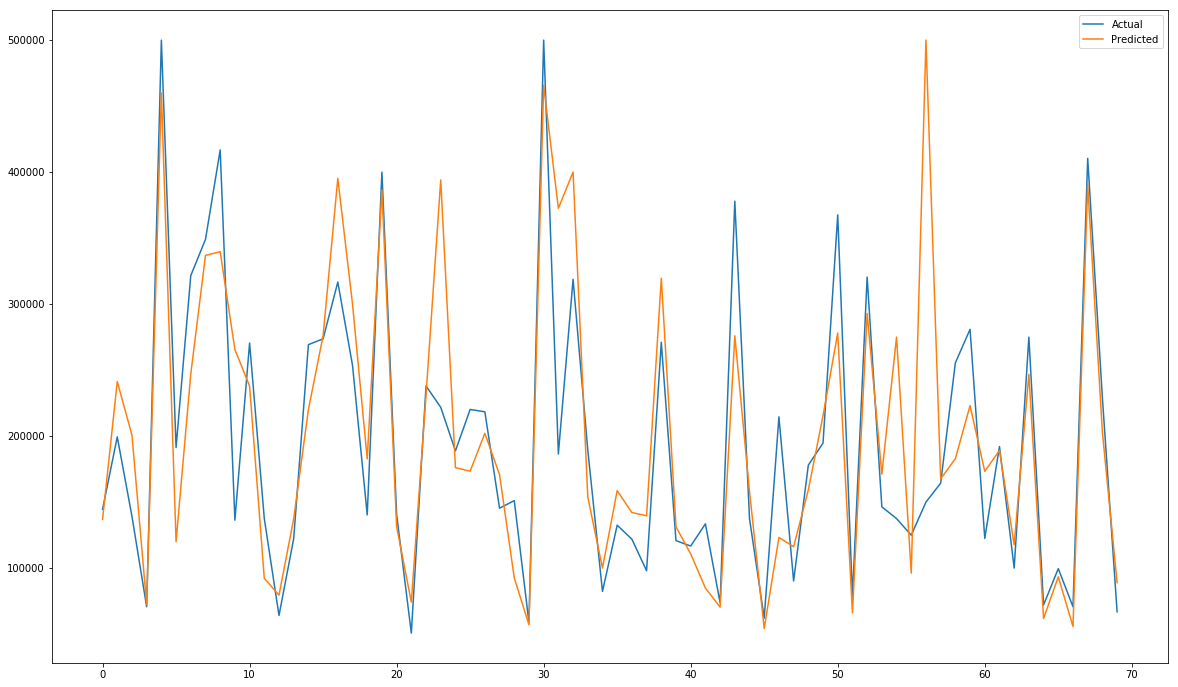

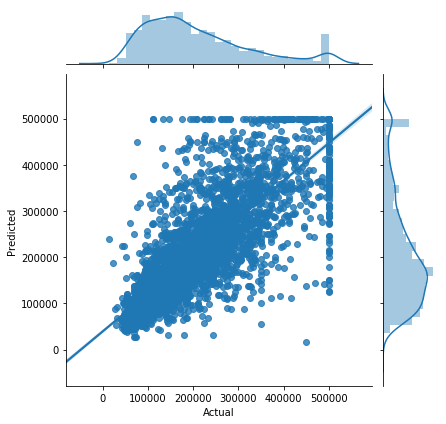

In [32]:
test = pd.DataFrame({'Predicted':y_pred_tree,'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.figure(figsize=(20,12))
plt.plot(test[:70])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

### As the root mean square error increased much further after applying the decision tree, We would aply Random Forest Regression.

# Applying Random Forest Regression 

In [33]:
random_Forest_Regressor = RandomForestRegressor(n_estimators=100, random_state=0)
random_Forest_Regressor.fit(X_train, y_train)
y_pred_forest = random_Forest_Regressor.predict(X_test)

rfg_mse = mean_squared_error(y_test, y_pred_forest)
rfg_rmse = np.sqrt(rfg_mse)
rfg_rmse

49197.23140524114

### After applying Random Forest Regression and calculating the root mean square error , we can clearly see that the error dropped to approx  49197.
### It means the predicted value could be actual value +- 49197..

In [34]:
print('Predicted Value :',y_pred_forest[0])
print('Actual Value :',y_test.values[0])

Predicted Value : 137784.0
Actual Value : 136900.0


### Here we can there is just slight difference between the actual value and predicted value.Again, we wil plot the graph for more insight of our predicted values over actual values.

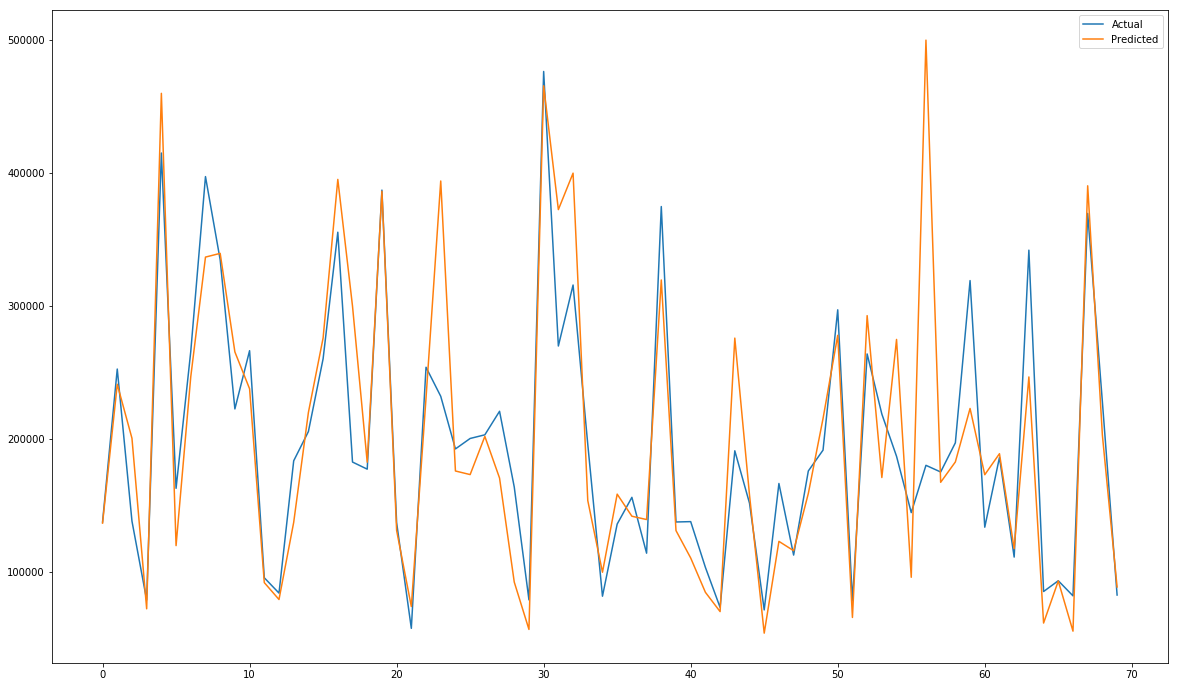

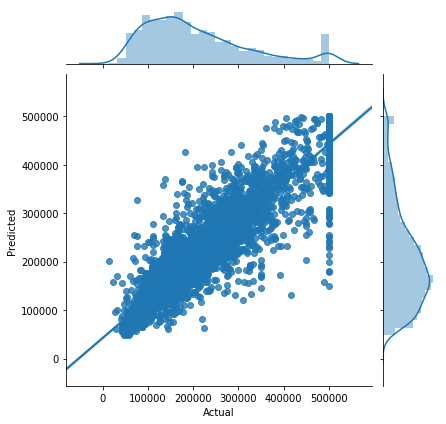

In [35]:
test = pd.DataFrame({'Predicted':y_pred_forest,'Actual':y_test})
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.figure(figsize=(20,12))
plt.plot(test[:70])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

# Applying DNN(Deep Neural Network)

In [36]:
import keras

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Before we can train a Keras network for regression, we first need to define the architecture itself.

we are performing regression, we add a Dense  layer containing 6 hidden layers with (128,64,32,16,8,4) neurons with a linear activation 
function. Typically we use ReLU-based activations, but since we are performing regression 
we need a linear activation.


In [41]:
DNN_regressor = Sequential()
DNN_regressor.add(Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 16))
DNN_regressor.add(Dense(output_dim = 64, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 32, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 16, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 8, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 4, init = 'uniform', activation='relu'))
DNN_regressor.add(Dense(output_dim = 1, init = 'uniform', activation='linear'))

DNN_regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
DNN_regressor.fit(X_train, y_train, epochs=150, batch_size=10)

C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=128, kernel_initializer="uniform")`
  
C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Rakesh Singh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform

Epoch 1/150
16512/16512 [==============================] - 4s 244us/step - loss: 22512999714.3876 - acc: 0.0000e+00
Epoch 2/150
16512/16512 [==============================] - 3s 197us/step - loss: 11056166297.5969 - acc: 0.0000e+00
Epoch 3/150
16512/16512 [==============================] - 3s 193us/step - loss: 10333985064.2403 - acc: 0.0000e+00
Epoch 4/150
16512/16512 [==============================] - 4s 226us/step - loss: 9627206040.5736 - acc: 0.0000e+00
Epoch 5/150
16512/16512 [==============================] - 3s 199us/step - loss: 8715082109.6899 - acc: 0.0000e+00
Epoch 6/150
16512/16512 [==============================] - 3s 198us/step - loss: 7778342718.0853 - acc: 0.0000e+00
Epoch 7/150
16512/16512 [==============================] - 3s 198us/step - loss: 6858821249.2248 - acc: 0.0000e+00
Epoch 8/150
16512/16512 [==============================] - 4s 217us/step - loss: 6175341206.6163 - acc: 0.0000e+00
Epoch 9/150
16512/16512 [==============================] - 4s 233us/step - lo

16512/16512 [==============================] - 3s 192us/step - loss: 3944626311.5979 - acc: 0.0000e+00
Epoch 72/150
16512/16512 [==============================] - 3s 195us/step - loss: 3961183258.4651 - acc: 0.0000e+00
Epoch 73/150
16512/16512 [==============================] - 3s 186us/step - loss: 3940602008.9729 - acc: 0.0000e+00
Epoch 74/150
16512/16512 [==============================] - 3s 192us/step - loss: 3923626364.1240 - acc: 0.0000e+00
Epoch 75/150
16512/16512 [==============================] - 4s 215us/step - loss: 3914623912.2064 - acc: 0.0000e+00
Epoch 76/150
16512/16512 [==============================] - 3s 186us/step - loss: 3934227307.9632 - acc: 0.0000e+00
Epoch 77/150
16512/16512 [==============================] - 3s 201us/step - loss: 3929181452.4457 - acc: 0.0000e+00
Epoch 78/150
16512/16512 [==============================] - 3s 189us/step - loss: 3897107271.1357 - acc: 6.0562e-05
Epoch 79/150
16512/16512 [==============================] - 3s 196us/step - loss: 390

16512/16512 [==============================] - 3s 197us/step - loss: 3705032244.9457 - acc: 0.0000e+00
Epoch 142/150
16512/16512 [==============================] - 3s 185us/step - loss: 3706458535.4186 - acc: 6.0562e-05
Epoch 143/150
16512/16512 [==============================] - 3s 185us/step - loss: 3716507268.0969 - acc: 0.0000e+00
Epoch 144/150
16512/16512 [==============================] - 3s 185us/step - loss: 3668068570.2267 - acc: 0.0000e+00
Epoch 145/150
16512/16512 [==============================] - 3s 207us/step - loss: 3701433392.6822 - acc: 0.0000e+00
Epoch 146/150
16512/16512 [==============================] - 3s 195us/step - loss: 3683141856.6589 - acc: 6.0562e-05
Epoch 147/150
16512/16512 [==============================] - 4s 243us/step - loss: 3681707496.8295 - acc: 0.0000e+00
Epoch 148/150
16512/16512 [==============================] - 4s 265us/step - loss: 3687743450.2674 - acc: 0.0000e+00
Epoch 149/150
16512/16512 [==============================] - 5s 318us/step - l

In [39]:
y_pred_DNN = DNN_regressor.predict(X_test)
print('Predicted Value :',y_pred_DNN[0])
print('Actual Value :',y_test.values[0])

Predicted Value : [157936.08]
Actual Value : 136900.0


In [43]:
DNN_mse =  mean_squared_error(y_test, y_pred_DNN)
DNN_rmse = np.sqrt(DNN_mse)
DNN_rmse

66156.81814097159

# Conclusion :
After fetching and cleanning the housing dataset of california, we applied four different types of regressions on our dataset to predict the cost of the house as accurate as possible. 
First, we applied Linear Regression model to our dataset. We got approximately 67000 root mean square error. It means that our predicted values could differ by 67000 to actual values.
Then,  we applied Decision Tree Method. We got approximately 70000 root mean square error. It means that our predicted values could differ by 70000 to actual values. we thought that this model could predict values more accurate but it predicted otherwise.
Then,  we applied Random Forest Regression model to our dataset. Here we got approximately 49000 as root mean square error. It means that our predicted values could differ by 49000 to actual values. We got the prediction values closest to actual values by applying this model.
After applying all these,  we applied Deep Neural Network(DNN) to our model. as the result of this we got approx 61000 as root mean square error.
Therefor, the best fit model according to us is Random Forest Regression and the second best fit model is DNN.